# The setup

A lot of times when you're using pandas you're also going to use matplotlib, and when you're using matplotlib you're also going to be making inline graphics. So why not do it all at once?

In [1]:
import pandas as pd

# The import

Always name your initial dataframe `df`. Always always always. Why? Because everyone else does, and because 

* when you slice it and dice it into different pieces (only really rich people, only cats, only flights to Finland, etc)
* you can give each of those names, while knowing `df` is your original dataframe.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# The examining

Your best friends for a quick peek are are 

* `df.head()` to see the first ten
* `df.columns` to see the column names
* `df.info()` to see more detailed info about each column
* `df.describe()` to see summary statistics about each numeric column

Once you do these few steps, you should be able to draw up a list of ten or so questions to ask your data.

In [8]:
df=pd.read_excel("richpeople.xlsx")

In [10]:
df.head()
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

# Slicing your data

I made a *terrible mistake* on Monday about how I taught sub-selects (the things that are basically SQL `WHERE` statements), and it's all because of how I named my variables.

We're going to take a sample of the data to work with so it looks a little cleaner - only take a few columns of the first 8. It's a complicated line, don't sweat it. Just think about the result for now.

In [11]:
recent = df[df['year'] == 2014]
recent = recent[['name','age','gender','selfmade','networthusbillion','countrycode','rank']]
recent = recent.sort_values(by='rank').head(8)
recent

,name,age,gender,selfmade,networthusbillion,countrycode,rank
284,Bill Gates,58.0,male,self-made,76.0,USA,1
348,Carlos Slim Helu,74.0,male,self-made,72.0,MEX,2
124,Amancio Ortega,77.0,male,self-made,64.0,ESP,3
2491,Warren Buffett,83.0,male,self-made,58.2,USA,4
1377,Larry Ellison,69.0,male,self-made,48.0,USA,5
509,David Koch,73.0,male,inherited,40.0,USA,6
381,Charles Koch,78.0,male,inherited,40.0,USA,6
2185,Sheldon Adelson,80.0,male,self-made,38.0,USA,8


Who is from the USA? There **two different things we can do**. This was a big point of confusion in class

1. We can **list whether someone is from the USA or not.**
2. Or, we can use that list to **select only the people from the USA.**

Let's look at them both, then see how they're used.

In [13]:
recent['countrycode']=='USA'

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

## Value counts vs. groupby

### groupby whenever you 

This just gave us a list of `True` and `False` values.

* First person? Definitely from the USA.
* Next row? Not from the USA.
* Third person? Not from the USA.
* Fourth? Yes, they're from the USA.

On the other hand, we can also use similar syntax to get a list of every person from the USA.

That one was a two-step process,

1. we got a list of `True`/`False` values (are they from the USA?), then
2. **fed that `True`/`False` list back into the dataframe.**

For every row that's `True`, it let us keep the row. If it was `False`, it doesn't let us keep the row.

## When to use what

Let's say we wanted to select every single row that is from USA, has inherited wealth, and is in the top 10 wealthiest people in the world. If we wanted to do it all on one line, we could!

That looks *super confusing*. In it we have three separate things we're testing for (a.k.a. getting True/False back)

* `sample['countrycode'] == 'USA'`
* `sample['selfmade'] == 'inherited'`
* `sample['rank'] < 10`

And we're jamming them all into `sample[blah blah]` to get back a dataframe for which all of those are true. It works, but it's ugly.

Again, let's remind ourselves what a piece like that looks like, it's **just a list of True and False values**

If we felt like the code we had before was a little too complicated, we could break it down into manageable, well-named pieces like this:

Let's look at each individual piece.

`is_american`, which is the same thing as `sample['countrycode'] == 'USA'`, is **not** a list of people. It is **not** a dataframe. It is a **list of true and false values**.

It's the same thing with `is_inherited` and `is_top_ten`. It's just a shortcut for me, so I don't have to type out `sample['selfmade'] == 'inherited'`. We can combine them all using `&` to get a list of `True`/`False` values in which every one of those conditions is true

Which we can then feed into the dataframe

So what I'm saying is, these two things are the same:

### Method One: Breaking into separate readable things

### Method Two: Doing it all at once

### Make sure you know the difference between these two

* `df['countrycode'] == 'USA'`
* `df[df['countrycode'] == 'USA']`

# Joining data

Now, let's say we wanted to join a bunch of data together. We have a lot of countries here, right? And we'd like to know how much of their wealth is concentrated in these rich people.

In [14]:
recent = df[df['year'] == 2014]
recent = recent[['name','countrycode','networthusbillion']]
recent.head()

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5
6,Abdulla bin Ahmad Al Ghurair,ARE,4.8
8,Abdullah Al Rajhi,SAU,2.4
9,Abdulsamad Rabiu,NGA,1.2


## What do we combine it with?

I'm going to get my GDP data from [this web site](http://statisticstimes.com/economy/world-gdp-ranking.php), because... I googled GDP 2014 and it came up.

We could manually say okay, so A. Jerrold Perenchio	has 2.6 billion dollars, and USA's GDP was 17.418 trillion (17418 billion), so he's at about 0.015% of the GDP. **But we are lazy, so we want the computer to do it.** In order to do that, though, we need to **merge that information into our existing dataset.**

I'm also too lazy to look up the GDP for every country, so I'm just going to pick the top ten.

In [15]:
# Make a list of dictionaries
country_gdp = [
   { 'country': 'USA', 'gdp': 17.418 },
   { 'country': 'DEU', 'gdp': 3.859 },
   { 'country': 'CHN', 'gdp': 10.380 },
   { 'country': 'RUS', 'gdp': 1.857 },
   { 'country': 'JPN', 'gdp': 4.616 },
   { 'country': 'BRA', 'gdp': 2.353 },
   { 'country': 'HKG', 'gdp': 0.289 },
   { 'country': 'FRA', 'gdp': 2.846 },
   { 'country': 'GBR', 'gdp': 2.945 },
   { 'country': 'IND', 'gdp': 2.049 }
]
country_gdp

[{'country': 'USA', 'gdp': 17.418},
 {'country': 'DEU', 'gdp': 3.859},
 {'country': 'CHN', 'gdp': 10.38},
 {'country': 'RUS', 'gdp': 1.857},
 {'country': 'JPN', 'gdp': 4.616},
 {'country': 'BRA', 'gdp': 2.353},
 {'country': 'HKG', 'gdp': 0.289},
 {'country': 'FRA', 'gdp': 2.846},
 {'country': 'GBR', 'gdp': 2.945},
 {'country': 'IND', 'gdp': 2.049}]

I'm also too lazy to find a csv that has the data I need, so **I'm going to make a dataframe out of a dictionary**. It's pretty easy.

In [17]:
# make a data frame
gdp_df=pd.DataFrame(country_gdp)
gdp_df

,country,gdp
0,USA,17.418
1,DEU,3.859
2,CHN,10.380
3,RUS,1.857
4,JPN,4.616
5,BRA,2.353
6,HKG,0.289
7,FRA,2.846
8,GBR,2.945
9,IND,2.049


In [18]:
gdp_df['billions'] = gdp_df['gdp']*1000
gdp_df

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0
5,BRA,2.353,2353.0
6,HKG,0.289,289.0
7,FRA,2.846,2846.0
8,GBR,2.945,2945.0
9,IND,2.049,2049.0


### STEP ONE: Finding a join key

My favorite resource for joining data with `pandas` is [this page](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join). It compares everything to SQL JOINs, which *I* understand. You could also check out [this page](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) which I find kind of confusing.

So what we need to do is **match up a column between our two dataframes.**

In [20]:
recent.head(3)

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5
6,Abdulla bin Ahmad Al Ghurair,ARE,4.8


In [21]:
gdp_df.head(3)

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0


It looks like we're going to be matching up **`countrycode`** from `df` with **`country`** from `gdp_df`.

### STEP TWO: Doing the merge

You merge using **`.merge`**, and then give two parameters: 

* **`left_on`**, the first dataframe's column name to merge on
* **`right_on`**, the second dataframe's column name to merge on

In [ ]:
# we are matching up:
#countrycode from recent to country from gdp_df

In [24]:
merged=recent.merge(gdp_df, left_on="countrycode", right_on="country")
merged.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abigail Johnson,USA,17.3,USA,17.418,17418.0
2,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0
3,Alan Gerry,USA,1.4,USA,17.418,17418.0
4,Alec Gores,USA,2.0,USA,17.418,17418.0


In [25]:
len(gdp_df) #len counts the number of columns in a table frame gdp_df

10

In [48]:
gdp_df

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0
5,BRA,2.353,2353.0
6,HKG,0.289,289.0
7,FRA,2.846,2846.0
8,GBR,2.945,2945.0
9,IND,2.049,2049.0


In [26]:
merged[merged['countrycode']=='SAU']

,name,countrycode,networthusbillion,country,gdp,billions


In [27]:
recent[recent['countrycode']=='SAU']

,name,countrycode,networthusbillion
8,Abdullah Al Rajhi,SAU,2.4
1711,Mohammad Al Amoudi,SAU,15.3
1713,Mohammed Al Issa,SAU,3.1
1902,Prince Alwaleed Bin Talal Alsaud,SAU,20.4
1903,Prince Sultan bin Mohammed bin Saud Al Kabeer,SAU,3.5
2125,Saleh Kamel,SAU,2.4
2292,Sulaiman Al Rajhi,SAU,1.9


### when we merged, we didn't have a gdp for Saudi Arabi, as a result, we got rid of all of the billionaires who were from Saudi Arabi because we didn't have a match for them

In [28]:
len(recent)

1653

In [29]:
len(merged)

1130

In [30]:
# A left join will allow you to have empty non-matching values so we'll have our Saudis back
left_merged = recent.merge(gdp_df, how="left", left_on="countrycode", right_on="country")
# on = 'country'
left_merged.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abdulla Al Futtaim,ARE,2.5,NaN,NaN,NaN
2,Abdulla bin Ahmad Al Ghurair,ARE,4.8,NaN,NaN,NaN
3,Abdullah Al Rajhi,SAU,2.4,NaN,NaN,NaN
4,Abdulsamad Rabiu,NGA,1.2,NaN,NaN,NaN


In [ ]:
#!= not equal

In [31]:
# .isnull will tell you if something is NaN or not
left_merged['billions'].isnull()
# or use.notnull() to pull out the ones where the value is not missing
only_people_with_gdps = left_merged[left_merged['billions'].notnull()]
only_people_with_gdps.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
5,Abigail Johnson,USA,17.3,USA,17.418,17418.0
6,Abilio dos Santos Diniz,BRA,2.8,BRA,2.353,2353.0
8,Adi Godrej,IND,3.5,IND,2.049,2049.0
9,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0


Hmmm see how rank skips through 1, 4, 5, 6, 6? This is because **we only kept rows we have matches for**. The second wealthiest person is from Mexico, but since we didn't have GDP from Mexico it left. You can see if we just do a simple `.count()`

We lost like 500 people! Maybe even if we don't have the GDP of their country we want to keep them?

### Types of joins

Let's just look at our data real quick before I explain the two major types of joins.

### Inner joins

The default kind of join is an **inner** join. It requires you to have a match on the left hand side AND the right hand side.

**If you're in the original dataframe and you don't have a match in the joining dataframe, you disappear.** Watch how Carlos "Slim" Helu and Amancio Ortega both disappear. 

### Left join

The other major kind of join is a **left join**. The "left" dataframe (the one you type first), gets to keep its rows, even if there aren't any matches in the joining dataframe.

In [33]:
import pandas as pd

In [40]:
nba = pd.read_csv("NBA-Census-10.14.2013.csv", encoding='mac_roman')
nba.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


In [ ]:
#\n: start a new line

In [47]:
nba.sort_values(by ='2013$')

KeyError: '2013$'

In [ ]:
nba.plot(kind='barh', x='Name', y='')

In [44]:
million_dollar_string.replace ("0","9")

NameError: name 'million_dollar_string' is not defined

In [45]:
million_dollar_string.replace("$", " ") #" ": empty

NameError: name 'million_dollar_string' is not defined

In [46]:
million_dollar_string.replce(",", " ")

NameError: name 'million_dollar_string' is not defined

In [ ]:
million_dollar_string.replace(",", " ").replace("$", " ")

### Other stuff

Did you see this image already? Well, now you have.

![](http://i.imgur.com/7Ssc4l.jpg)

<img src="data:image/jpeg;base64,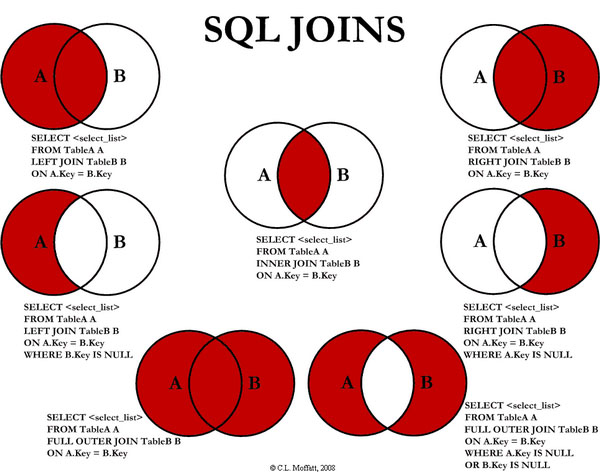">